# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kartika Deviani
- **Email:** m124d4kx1516@bangkit.academy
- **ID Dicoding:** kartika_deviani

## Menentukan Pertanyaan Bisnis

- Pada jam berapa orang-orang paling banyak dan sedikit melakukan penyewaan sepeda?
- Bagaimana rata-rata jumlah penyewa sepeda berdasarkan perubahan musim?
- Bagaimana rata-rata jumlah penyewa sepeda berdasarkan perubahan cuaca?
- Bagaimana hubungan yang tampak ketika penyewaan sepeda pada workingday dan weekday? apakah terdapat perbedaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

**Informasi Data**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
	+ 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	+ 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	+ 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	+ 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


Memuat tabel Day

In [3]:
day_df = pd.read_csv("/content/drive/MyDrive/Course Exercise/submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour

In [4]:
hour_df = pd.read_csv("/content/drive/MyDrive/Course Exercise/submission/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### **Menilai Data day_df**

**Memeriksa tipe data dari tiap kolom**

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat pada informasi di atas pada kolom **dteday** tipe datanya masih berberbentuk object. Kita perlu menggantinya dengan tipe data datetime. Selain itu kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit juga perlu diubah menjadi tipe data kategori.

**Jumlah missing values**

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada tabel day_df

**Periksa duplikasi data**

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data yang duplikat pada tabel day_df

**Menampilkan ringkasan parameter statistik(mean, median, dll.)**

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada data yang bermasalah pada statistik di atas

#### **Menilai Data hour_df**

**Memeriksa tipe data dari tiap kolom**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat kita lihat pada informasi di atas pada kolom **dteday** tipe datanya masih berberbentuk object. Kita perlu menggantinya dengan tipe data datetime. Selain itu kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit juga perlu diubah menjadi tipe data kategori.

**Jumlah missing value**

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value pada tabel hour_df

**Memeriksa duplikasi**

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada data yang duplikat pada tabel hour_df

**Menampilkan ringkasan parameter statistik**

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada data yang bermasalah atau aneh pada statistik di atas

### Cleaning Data

#### 1. Menghapus kolom yang tidak digunakan

In [13]:
# Menghapus kolom instant
day_df.drop(['instant'],axis=1, inplace=True)
hour_df.drop(['instant'],axis=1, inplace=True)
# Menghapus kolom holiday
day_df.drop(['holiday'],axis=1, inplace=True)
hour_df.drop(['holiday'],axis=1, inplace=True)
# Menghapus kolom windspeed
day_df.drop(['windspeed'],axis=1, inplace=True)
hour_df.drop(['windspeed'],axis=1, inplace=True)

In [14]:
day_df.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [15]:
hour_df.head()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,6,0,1,0.24,0.2879,0.75,0,1,1


#### 2. Mengubah nama kolom agar mudah dibaca

In [16]:
day_df_new = day_df.rename(columns={
    'dteday' : 'date_day',
    'yr' : 'year',
    'mnth' : 'month',
    'weekday' : 'day',
    'weathersit' : 'weather',
    'casual' : 'casual_user',
    'registered': 'registered_user',
    'cnt' : 'total_user'
})

In [17]:
hour_df_new = hour_df.rename(columns={
    'dteday' : 'date_day',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weekday' : 'day',
    'weathersit' : 'weather',
    'casual' : 'casual_user',
    'registered': 'registered_user',
    'cnt' : 'total_user'
})

#### 3. Mengubah tipe data

In [18]:
#kolom date_day dari object ke datetime
day_df_new['date_day'] = pd.to_datetime(day_df_new['date_day'])

In [19]:
hour_df_new['date_day'] = pd.to_datetime(hour_df_new['date_day'])

In [20]:
day_df_new.info()
print("\n")
hour_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_day         731 non-null    datetime64[ns]
 1   season           731 non-null    int64         
 2   year             731 non-null    int64         
 3   month            731 non-null    int64         
 4   day              731 non-null    int64         
 5   workingday       731 non-null    int64         
 6   weather          731 non-null    int64         
 7   temp             731 non-null    float64       
 8   atemp            731 non-null    float64       
 9   hum              731 non-null    float64       
 10  casual_user      731 non-null    int64         
 11  registered_user  731 non-null    int64         
 12  total_user       731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 74.4 KB


<class 'pandas.core.frame.Da

In [21]:
#mengubah tipe data kategori

day_df_new['season_label'] = day_df_new['season'].map({
    1 : "spring",
    2 : "summer",
    3 : "fall",
    4 : "winter"
})

hour_df_new['season_label'] = hour_df_new['season'].map({
    1 : "spring",
    2 : "summer",
    3 : "fall",
    4 : "winter"
})

day_df_new['year_label'] = day_df_new['year'].map({
    0 : '2011',
    1 : '2012'
})
hour_df_new['year_label'] = hour_df_new['year'].map({
    0 : '2011',
    1 : '2012'
})

day_df_new['month_label'] = day_df_new['month'].map({
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
})
hour_df_new['month_label'] = hour_df_new['month'].map({
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
})

day_df_new['day_label'] = day_df_new['day'].map({
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
})
hour_df_new['day_label'] = hour_df_new['day'].map({
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
})

day_df_new['weather_label'] = day_df_new['weather'].map({
    1 : 'Clear/Partly cloudy',
    2 : 'Mist/Cloudy',
    3 : 'Light Snow/Rain',
    4 : 'Heavy Rain/Thunderstorm/Snow'
})
hour_df_new['weather_label'] = hour_df_new['weather'].map({
    1 : 'Clear/Partly cloudy',
    2 : 'Mist/Cloudy',
    3 : 'Light Snow/Rain',
    4 : 'Heavy Rain/Thunderstorm/Snow'
})

day_df_new['workingday_label'] = day_df_new['workingday'].map({
    0 : 'Weekend',
    1 : 'Weekday'
})
hour_df_new['workingday_label'] = hour_df_new['workingday'].map({
    0 : 'Weekend',
    1 : 'Weekday'
})

In [22]:
day_df_new.head(100)

,date_day,season,year,month,day,workingday,weather,temp,atemp,hum,casual_user,registered_user,total_user,season_label,year_label,month_label,day_label,weather_label,workingday_label
0,2011-01-01,1,0,1,6,0,2,0.344167,0.363625,0.805833,331,654,985,spring,2011,January,Saturday,Mist/Cloudy,Weekend
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801,spring,2011,January,Sunday,Mist/Cloudy,Weekend
2,2011-01-03,1,0,1,1,1,1,0.196364,0.189405,0.437273,120,1229,1349,spring,2011,January,Monday,Clear/Partly cloudy,Weekday
3,2011-01-04,1,0,1,2,1,1,0.200000,0.212122,0.590435,108,1454,1562,spring,2011,January,Tuesday,Clear/Partly cloudy,Weekday
4,2011-01-05,1,0,1,3,1,1,0.226957,0.229270,0.436957,82,1518,1600,spring,2011,January,Wednesday,Clear/Partly cloudy,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-04-06,2,0,4,3,1,1,0.390833,0.387608,0.470833,413,2395,2808,summer,2011,April,Wednesday,Clear/Partly cloudy,Weekday
96,2011-04-07,2,0,4,4,1,1,0.437500,0.433696,0.602917,571,2570,3141,summer,2011,April,Thursday,Clear/Partly cloudy,Weekday
97,2011-04-08,2,0,4,5,1,2,0.335833,0.324479,0.836250,172,1299,1471,summer,2011,April,Friday,Mist/Cloudy,Weekday
98,2011-04-09,2,0,4,6,0,2,0.342500,0.341529,0.877500,879,1576,2455,summer,2011,April,Saturday,Mist/Cloudy,Weekend


In [23]:
day_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_day          731 non-null    datetime64[ns]
 1   season            731 non-null    int64         
 2   year              731 non-null    int64         
 3   month             731 non-null    int64         
 4   day               731 non-null    int64         
 5   workingday        731 non-null    int64         
 6   weather           731 non-null    int64         
 7   temp              731 non-null    float64       
 8   atemp             731 non-null    float64       
 9   hum               731 non-null    float64       
 10  casual_user       731 non-null    int64         
 11  registered_user   731 non-null    int64         
 12  total_user        731 non-null    int64         
 13  season_label      731 non-null    object        
 14  year_label        731 non-

## Exploratory Data Analysis (EDA)

### Explorasi Data day_df_new

#### Melihat jumlah penyewa yang sudah teregustrasi dan penyewa casual

In [24]:
day_df_new.registered_user.sum()

2672662

In [25]:
day_df_new.casual_user.sum()

620017

Jumlah penyewa yang teregistrasi (registered_user) lebih banyak dibandingkan dengan penyewa biasa(casual_user)

#### Penyewaan sepeda berdasarkan Hari

In [26]:
day_df_new.groupby('day_label').agg({'total_user': ["max", "min", "mean", "std"]})

total_user                                
                 max   min         mean          std
day_label                                           
Friday          8362  1167  4690.288462  1874.624870
Monday          7525    22  4338.123810  1793.074013
Saturday        8714   627  4550.542857  2196.693009
Sunday          8227   605  4228.828571  1872.496629
Thursday        7804   431  4667.259615  1939.433317
Tuesday         7767   683  4510.663462  1826.911642
Wednesday       8173   441  4548.538462  2038.095884

Dari hasil di atas, rata-rata orang yang menyewa sepeda paling banyak adalah saat hari Jumat/Friday. Dan yang paling sedikit adalah saat hari Minggu/Sunday.

#### Penyewaan sepeda berdasarkan bulan

In [27]:
day_df_new.groupby('month_label').agg({'total_user': ["max", "min", "mean", "std"]})

total_user                                
                   max   min         mean          std
month_label                                           
April             7460   795  4484.900000  1776.160778
August            7865  1115  5664.419355  1494.516146
December          6606   441  3403.806452  1549.639353
February          5062  1005  2655.298246  1145.313307
January           4521   431  2176.338710  1161.674370
July              8173  3285  5563.677419  1273.751871
June              8120  3767  5772.366667  1240.400031
March             8362   605  3692.258065  1899.301812
May               8294  2633  5349.774194  1298.711561
November          6852  1495  4247.183333  1285.712709
October           8156    22  5199.225806  1988.392517
September         8714  1842  5766.516667  1810.130649

Dari hasil di atas, rata-rata orang yang menyewa sepeda paling banyak adalah saat bulan Juni/June. Dan yang paling sedikit adalah saat bulan Januari/January.

#### Penyewaan sepeda berdasarkan musim

In [28]:
day_df_new.groupby('season_label').agg({'total_user': ["max", "min", "mean", "std"]})

total_user                                
                    max   min         mean          std
season_label                                           
fall               8714  1115  5644.303191  1459.800381
spring             7836   431  2604.132597  1399.942119
summer             8362   795  4992.331522  1695.977235
winter             8555    22  4728.162921  1699.615261

Dari hasil di atas, rata-rata orang yang menyewa sepeda paling banyak adalah saat musim gugur/fall. Dan yang paling sedikit adalah saat musim semi/spring.

In [29]:
casualUser = day_df_new.groupby("season_label").casual_user.sum().sort_values(ascending=False).reset_index()
casualUser

,season_label,casual_user
0,fall,226091
1,summer,203522
2,winter,129782
3,spring,60622


berdasarkan musim, penyewa dengan tipe casual_user banyak menyewa sepeda pada musim gugur

In [30]:
registeredUser = day_df_new.groupby("season_label").registered_user.sum().sort_values(ascending=False).reset_index()
registeredUser

,season_label,registered_user
0,fall,835038
1,summer,715067
2,winter,711831
3,spring,410726


berdasarkan musim, penyewa dengan tipe registered_user banyak menyewa sepeda pada musim gugur

In [31]:
seasonUser = pd.merge(
    left = casualUser,
    right = registeredUser,
    how="left",
    left_on="season_label",
    right_on="season_label"
)
seasonUser

,season_label,casual_user,registered_user
0,fall,226091,835038
1,summer,203522,715067
2,winter,129782,711831
3,spring,60622,410726


berdasarkan musim, penyewa dengan tipe casual_user dan registered_user banyak menyewa sepeda pada musim gugur dan paling sedikit pada musim semi

In [32]:
seasonUser_type = seasonUser.melt(id_vars='season_label', var_name='user_type', value_name='total_user')
seasonUser_type

,season_label,user_type,total_user
0,fall,casual_user,226091
1,summer,casual_user,203522
2,winter,casual_user,129782
3,spring,casual_user,60622
4,fall,registered_user,835038
5,summer,registered_user,715067
6,winter,registered_user,711831
7,spring,registered_user,410726


#### Penyewaan Sepeda berdasarkan cuaca

In [33]:
day_df_new.groupby('weather_label').agg({'total_user': ["max", "min", "mean", "std"]})

total_user                               
                           max  min         mean          std
weather_label                                                
Clear/Partly cloudy       8714  431  4876.786177  1879.483989
Light Snow/Rain           4639   22  1803.285714  1240.284449
Mist/Cloudy               8362  605  4035.862348  1809.109918

Dari hasil di atas, rata-rata orang yang menyewa sepeda paling banyak adalah saat Cuaca cerah/cerah berawan. Dan yang paling sedikit adalah saat cuaca buruk (hujan/turun salju).

#### Penyewaan sepeda pada hari biasa dan weekend/libur

In [34]:
day_df_new.groupby('workingday_label').agg({'total_user': ["max", "min", "mean", "std"]})

total_user                               
                        max  min         mean          std
workingday_label                                          
Weekday                8362   22  4584.820000  1878.415583
Weekend                8714  605  4330.168831  2052.141245

Dari hasil di atas, rata-rata orang yang menyewa sepeda paling banyak adalah saat hari biasa/ hari kerja. Dan yang paling sedikit adalah saat weekend/ hari libur.

### Explorasi Data hour_df_new

In [35]:
hour_df_new.groupby('hour').agg({'total_user': ["max", "min", "mean", "std"]})

total_user                            
            max min        mean         std
hour                                       
0           283   2   53.898072   42.307910
1           168   1   33.375691   33.538727
2           132   1   22.869930   26.578642
3            79   1   11.727403   13.239190
4            28   1    6.352941    4.143818
5            66   1   19.889819   13.200765
6           213   1   76.044138   55.084348
7           596   1  212.064649  161.441936
8           839   5  359.011004  235.189285
9           426  14  219.309491   93.703458
10          539   8  173.668501  102.205413
11          663  10  208.143054  127.495536
12          776   3  253.315934  145.081134
13          760  11  253.661180  148.107657
14          750  12  240.949246  147.271574
15          750   7  251.233196  144.632541
16          783  11  311.983562  148.682618
17          976  15  461.452055  232.656611
18          977  23  425.510989  224.639304
19          743  11  311.523352  161.050359
20          567  11  226.030220  119.670164
21          584   6  172.314560   89.788893
22          502   9  131.335165   69.937782
23          256   2   87.831044   50.846889

Dari hasil di atas, rata-rata orang yang menyewa sepeda paling banyak adalah saat jam 17 atau jam 5 sore. Dan yang paling sedikit adalah saat jam 4 pagi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa orang-orang paling banyak dan sedikit melakukan penyewaan sepeda?


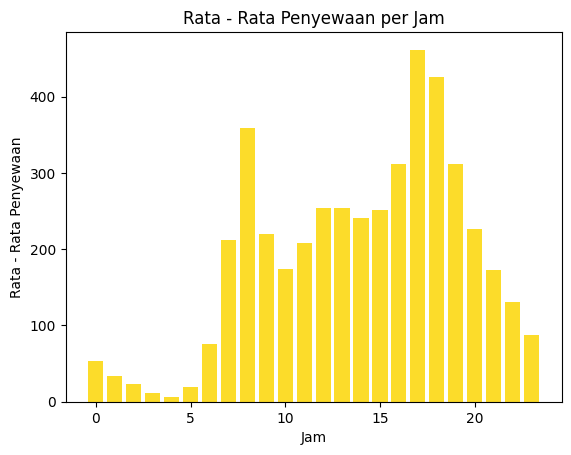

In [36]:
jamSewa = hour_df_new.groupby('hour')['total_user'].mean()

plt.bar(jamSewa.index, jamSewa.values, color='#FCDC2A')

plt.title('Rata - Rata Penyewaan per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Penyewaan')

plt.show()

Jika dilihat dari hasil visualisasi bar plot di atas diketahui bahwa rata-rata penyewaan sepeda paling laris berada pada pukul 17.00 atau jam 5 sore, jam 18.00 dan jam 08.00 dan paling sedikit pada pukul 04.00 pagi.

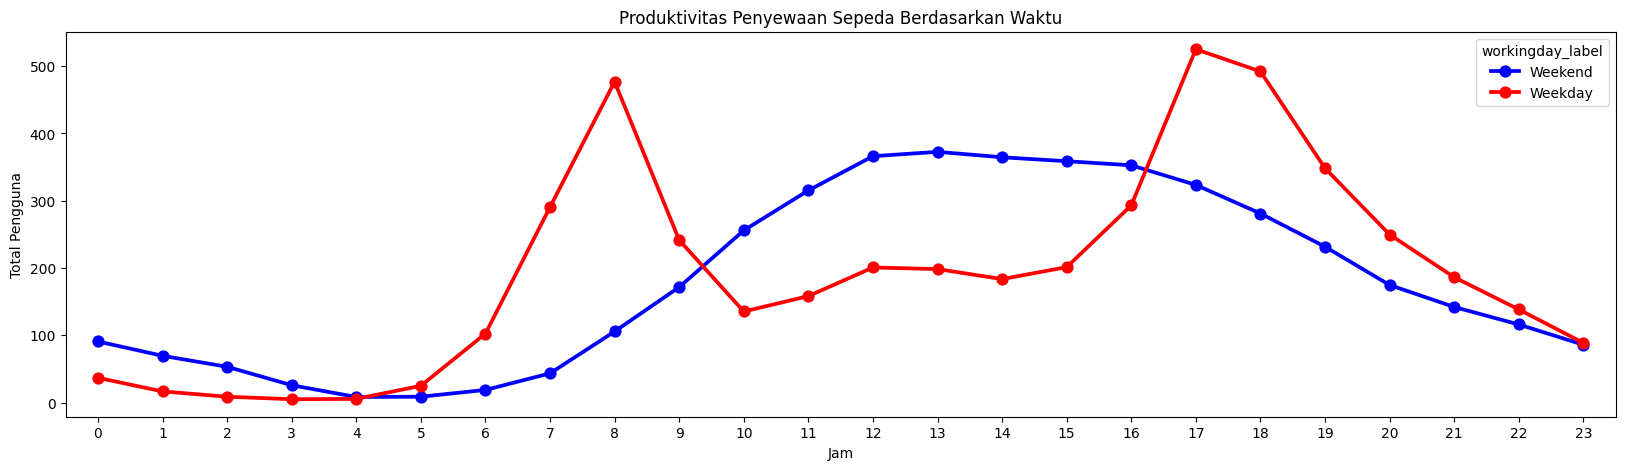

In [37]:
x = hour_df_new['hour']
y = hour_df_new['total_user']
hue = hour_df_new['workingday_label']

# Membuat plot menggunakan seaborn
fig, ax = plt.subplots(figsize=(20, 5))
sns.pointplot(data =hour_df_new ,x=x, y=y, hue=hue, palette={'Weekend': 'b', 'Weekday': 'r'}, errorbar=None, ax=ax)

ax.set_title('Produktivitas Penyewaan Sepeda Berdasarkan Waktu')
ax.set_ylabel('Total Pengguna')
ax.set_xlabel('Jam')

plt.show()

Jika dilihat lebih spesifik lagi, penyewaan sepeda mencapai puncaknya ketika weekday atau hari kerja di pukul 08.00 dan pukul 17.00. Sedangkan pada waktu weekend, penyewaan sepeda mulai mencapai puncak dari jam 07.00 menuju pukul 12.00. Dan mulai menurun di jam 17.00.

### Pertanyaan 2: Bagaimana rata-rata jumlah penyewa sepeda berdasarkan perubahan musim?

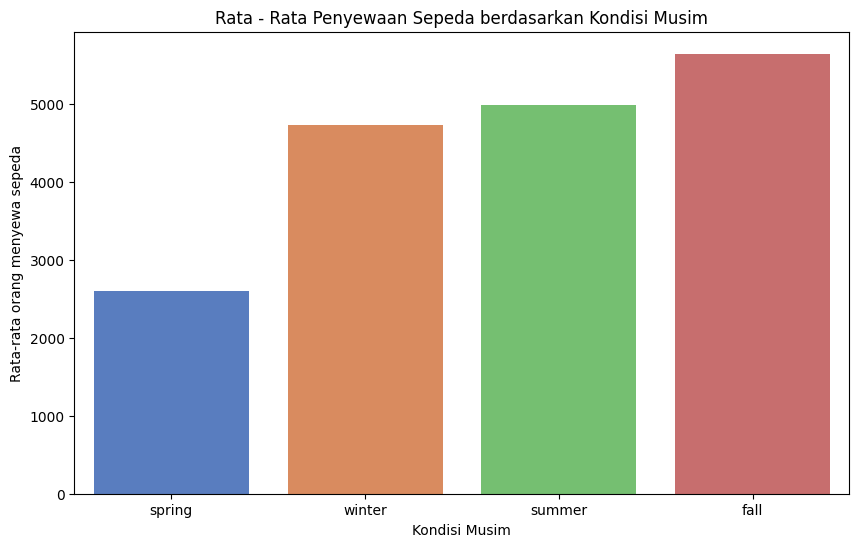

In [38]:
sewaMusim = day_df_new.groupby('season_label')['total_user'].mean().reset_index().sort_values("total_user")

plt.figure(figsize=(10, 6))
sns.barplot(x='season_label', y='total_user', hue='season_label', data=sewaMusim, palette='muted', legend=False)

plt.title('Rata - Rata Penyewaan Sepeda berdasarkan Kondisi Musim')
plt.xlabel('Kondisi Musim')
plt.ylabel('Rata-rata orang menyewa sepeda')

plt.show()

Berdasarkan Kondisi musim penyewaan sepeda sangat diminati di musim gugur dengan rata-rata penyewa 5600 orang dan kurang diminati pada musim semi dengan rata-rata penyewa sekitar 2700an.

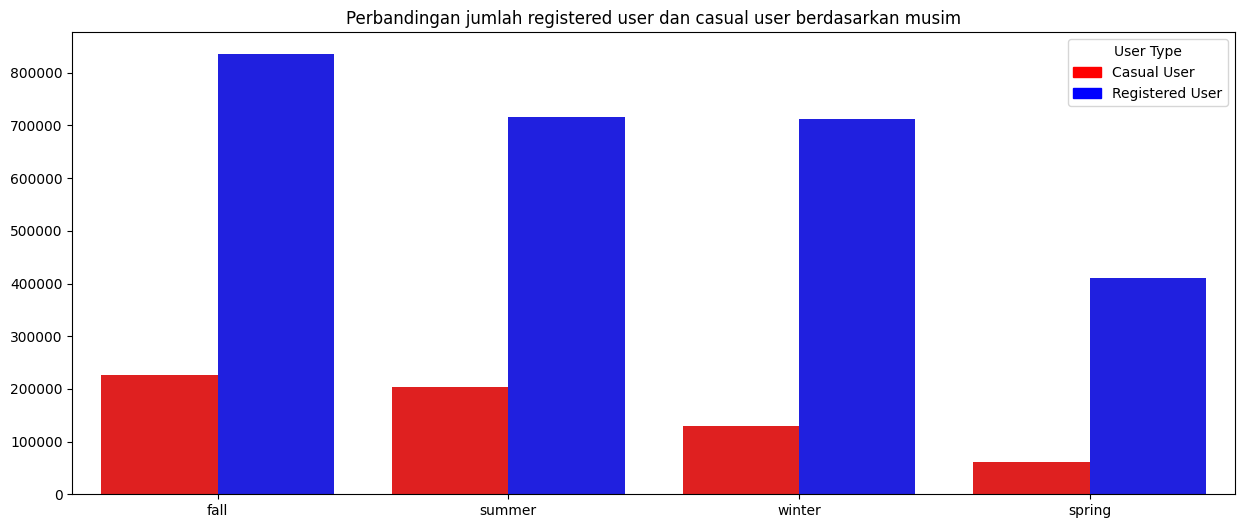

In [39]:
plt.figure(figsize=(15, 6))

sns.barplot(x="season_label", y="total_user", hue="user_type", data=seasonUser_type, palette={'registered_user': 'b', 'casual_user': 'r'})
plt.ylabel(None)
plt.xlabel(None)
plt.title("Perbandingan jumlah registered user dan casual user berdasarkan musim")
casual_patch = mpatches.Patch(color='r', label='Casual User')
registered_patch = mpatches.Patch(color='b', label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

Jika dilihat lebih spesifik lagi berdasarkan tipe penyewanya, tipe penyewa registered user mendominasi dan jumlah terbanyak ada di musim gugur dengan jumlah penyewa diatas 800.000. Begitu pula dengan tipe casual walaupun tidak mendominasi dari segi jumlah, namun kedua tipe ini memiliki kesamaan dengan jumlah penyewaan terbanyak pada musim gugur dengan jumlah penyewa 226091 orang.

### Pertanyaan 3: Bagaimana jumlah rata-rata penyewaan sepeda terhadap perubahan cuaca?

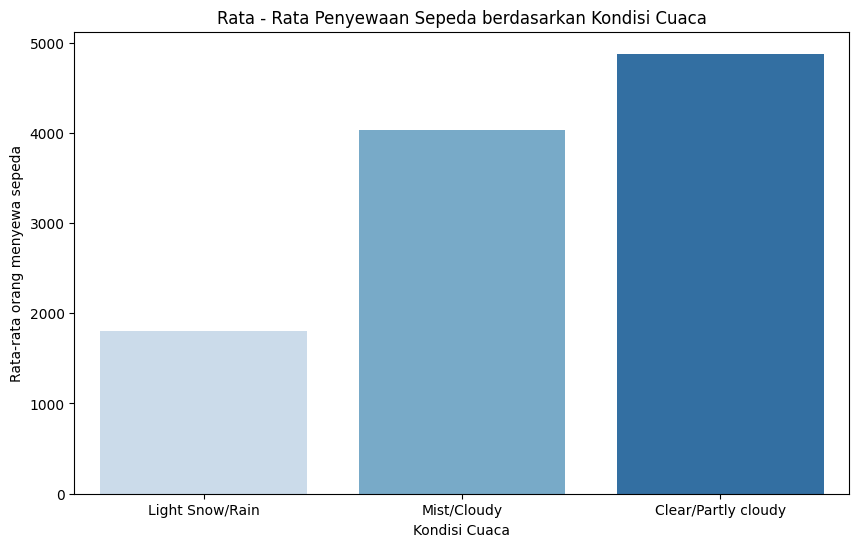

In [40]:
sewaCuaca = day_df_new.groupby('weather_label')['total_user'].mean().reset_index().sort_values("total_user")

plt.figure(figsize=(10, 6))
sns.barplot(x='weather_label', y='total_user', hue='weather_label', data=sewaCuaca, palette='Blues', legend=False)

plt.title('Rata - Rata Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata orang menyewa sepeda')

plt.show()

Berdasarkan visualisasi jumlah rata-rata penyewa berdasarkan kondisi cuaca, Cuaca yang paling diminati untuk menyewa sepeda adalah pada saat cuaca cerah atau cerah berawan, sedangkan cuaca hujan dan bersalju adalah cuaca dengan rata-rata penyewa terendah.

### Pertanyaan 4: Bagaimana hubungan yang tampak ketika penyewaan sepeda pada workingday dan weekday? apakah terdapat perbedaan?

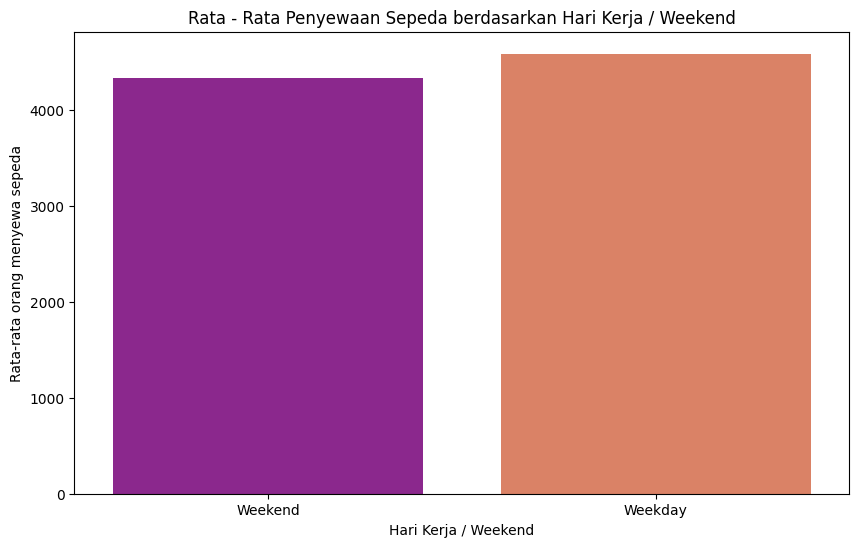

In [41]:
sewaDay = day_df_new.groupby('workingday_label')['total_user'].mean().reset_index().sort_values("total_user")

plt.figure(figsize=(10, 6))
sns.barplot(x='workingday_label', y='total_user', hue='workingday_label', data=sewaDay, palette='plasma', legend=False)

plt.title('Rata - Rata Penyewaan Sepeda berdasarkan Hari Kerja / Weekend')
plt.xlabel('Hari Kerja / Weekend')
plt.ylabel('Rata-rata orang menyewa sepeda')

plt.show()

Rata-rata penyewa saat weekday/hari kerja dengan weekend/hari libur berbeda. Kebanyakan penyewa lebih memilih meyewa di hari kerja/weekday dari pada hari libur/weekend.

## Conclusion

- Conclution pertanyaan 1: Rata-rata penyewaan sepeda paling banyak terjadi pada pukul 17.00, 18.00 dan 08.00 dimana pada waktu-waktu itu banyak aktivitas berangkat kerja/sekolah maupun pulang kerja/sekolah. Sedangkan waktu yang paling sedikit terjadi pada pukul 04.00 dimana pada jam segitu banyak orang masih belum bangun tidur atau belum melakukan aktivitas di luar rumah. Penjelasan spesifiknya jika dilihat dari hasil line plot untuk aktivitas sewa sepeda pada working day/ weekday dan weekend, aktivitas sewa sepeda lebih banyak dilakukan pada saat weekday/working day pada pukul 08.00, 17.00, dan 18.00. Sedangkan pada waktu weekend aktivitas sewa sepeda tidak sebanyak pada saat working day, penyewaan sepeda mulai dari jam 07.00 menuju puncaknya pukul 12.00. Dan mulai menurun di jam 17.00. dimana pada waktu-waktu tersebut biasanya digunakan untuk berolahraga, rekreasi, atau hiburan sekedar hobi.

- Conclution pertanyaan 2: Rata-rata penyewaan sepeda berbeda setiap musim. Aktivitas sewa sepeda paling banyak ada pada musim gugur, dan paling sedikit pada musim semi.Jika dilihat lebih spesifik lagi berdasarkan tipe penyewanya, tipe penyewa registered user mendominasi dan jumlah terbanyak ada di musim gugur dengan jumlah penyewa diatas 800.000. Begitu pula dengan tipe casual walaupun tidak mendominasi dari segi jumlah, namun kedua tipe ini memiliki kesamaan dengan jumlah penyewaan terbanyak pada musim gugur dengan jumlah penyewa 226091 orang.

- Conclution pertanyaan 3: Rata-rata penyewaan sepeda berbeda setiap ada perubahan cuaca. Aktivitas sewa sepeda paling banyak ada pada cuaca cerah, dimana orang-orang bisa dengan nyaman beraktivitas pada cuaca ini. Cuaca yang memiliki aktivitas sewa sepeda paling rendah adalah cuaca hujan, di cuaca ini kebanyakan orang biasanya lebih memilih menggunakan angkutan umum dari pada menggunakan sepeda.

- Conclution pertanyaan 4: Rata-rata penyewa saat weekday/hari kerja dengan weekend/hari libur berbeda. Kebanyakan penyewa lebih memilih meyewa di hari kerja/weekday dari pada hari libur/weekend. Biasanya yang lebih banyak menggunakan sepeda pada hari kerja adalah pelajar dan pekerja. Hal ini juga bisa dipengaruhi oleh kegiatan harian seperti pergi berbelanja, sekolah, maupun pergi bekerja.

## Export to csv

In [42]:
path = "/content/drive/MyDrive/Course Exercise/submission/data"
day_df_new.to_csv(os.path.join(path,r"day_clean.csv"))
hour_df_new.to_csv(os.path.join(path,r"hour_clean.csv"))